In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pyreadr
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Define colors and parameters

In [128]:
path = "../../plots/"

In [129]:
plt.style.use('seaborn-v0_8')

In [130]:
ticksize = 20
fontsize = 28
axsize = 25
legendsize = 20

## Sizes

In [131]:
single_1 = (20,8)

# Plot GEV

In [49]:
gen = scipy.stats.genextreme
x = np.linspace(-3,5,1000)

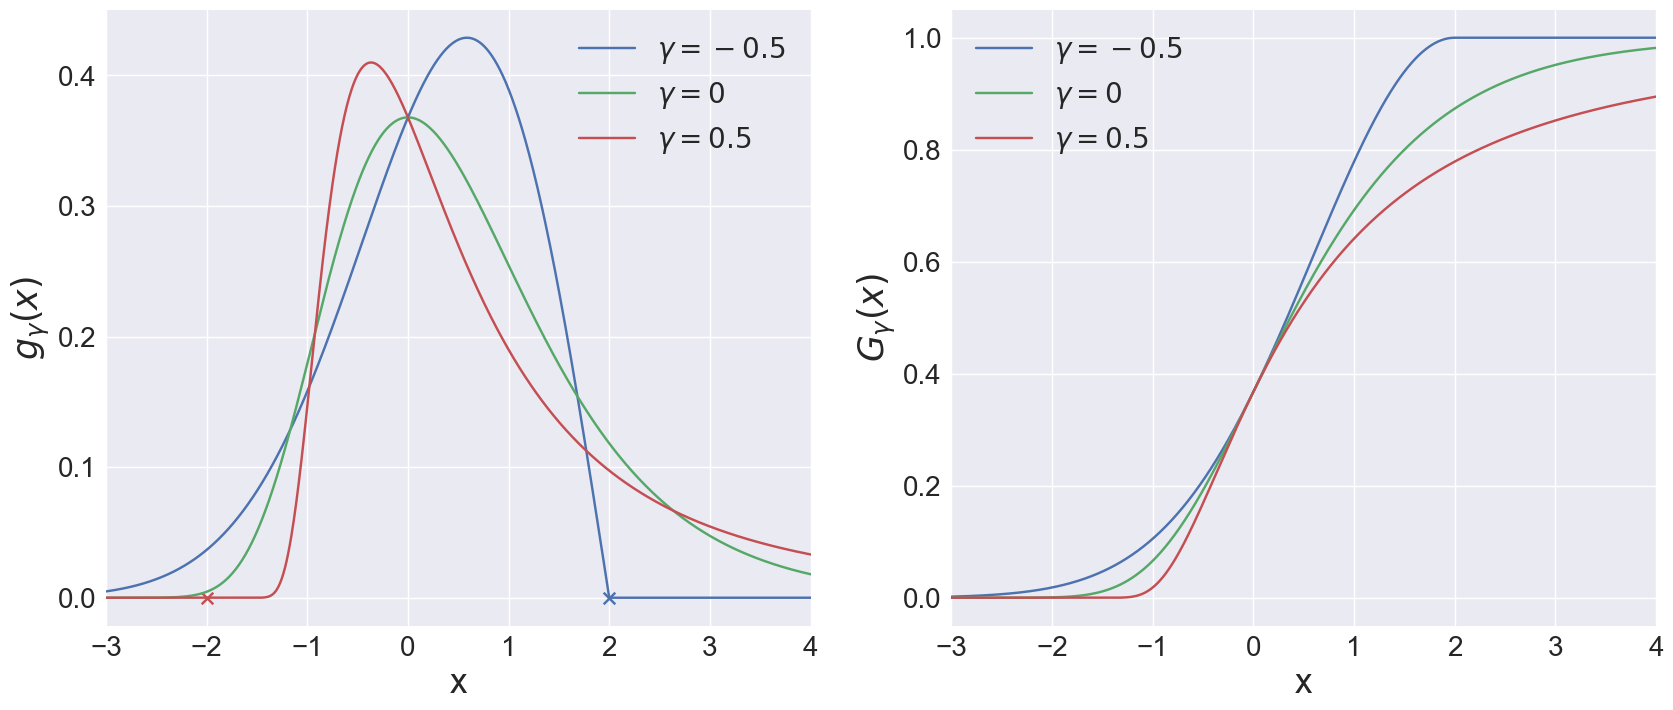

In [61]:
fig, axs = plt.subplots(1,2, figsize = single_1)

for c in [-0.5,0,0.5]:
    y = gen.pdf(x, -c)
    #y[y == 0] = np.nan
    y2 = gen.cdf(x, -c)
    axs[0].plot(x, y, label = fr'$\gamma = {c}$')
    axs[1].plot(x, y2, label = fr'$\gamma = {c}$')
    
axs[0].scatter(2, 0, marker = "x", s = 70)
axs[0].scatter(-7,0)
axs[0].scatter(-2, 0, marker = "x", s = 70)


axs[0].set_xlim([-3,4])    
axs[0].set_xlabel("x", fontsize = axsize)
axs[0].set_ylabel(r"$g_\gamma(x)$", fontsize = axsize)
axs[0].legend(fontsize = legendsize)
axs[0].tick_params(axis='both', labelsize=ticksize)

axs[1].set_xlim([-3,4])    
axs[1].set_xlabel("x", fontsize = axsize)
axs[1].set_ylabel(r"$G_\gamma(x)$", fontsize = axsize)
axs[1].legend(fontsize = legendsize)
axs[1].tick_params(axis='both', labelsize=ticksize)

plt.savefig(path +"gev_example.pdf", bbox_inches = "tight")

# Plot max-stable simulation

In [159]:
def corr_func(h, r = 1.5, s = 0.5):
    res = np.exp(-np.power((h/r),s))
    return res    

In [160]:
def gaussian_process(n, left = -2, right = 2):    
    x = np.expand_dims(np.linspace(-2, 2, n), 1)
    sigma = corr_func(scipy.spatial.distance.cdist(x, x, 'sqeuclidean'))

    # Draw samples from the prior at our data points.
    # Assume a mean of 0 for simplicity
    ys = np.random.multivariate_normal(
        mean=np.zeros(n), cov=sigma, 
        size=1)
    return np.squeeze(ys)

In [224]:
def y_i(n = 100, left = -2, right = 2):
    eps = gaussian_process(n, left, right)
    eps[eps < 0] = 0
    y = np.sqrt(2 * np.pi) * eps
    return y    

In [225]:
n_sim = 50
n = 250
x = np.linspace(-1, 1, n)

In [226]:
points = np.zeros(n_sim)
processes = np.zeros((n_sim, n))
s = 0
c = 3

for sim in range(n_sim):
    s = s + np.random.exponential(1)
    points[sim] = 1/s
    processes[sim] = y_i(n)
    scaled_processes = np.expand_dims(points, 1) * processes
    max_process = np.max(scaled_processes, axis = 0)
    if points[sim]* c < np.min(max_process):
        break

In [227]:
# Define outcome
sorted_points = -np.sort(-points)
scaled_processes = np.expand_dims(points, 1) * processes
max_process = np.max(scaled_processes, axis = 0)

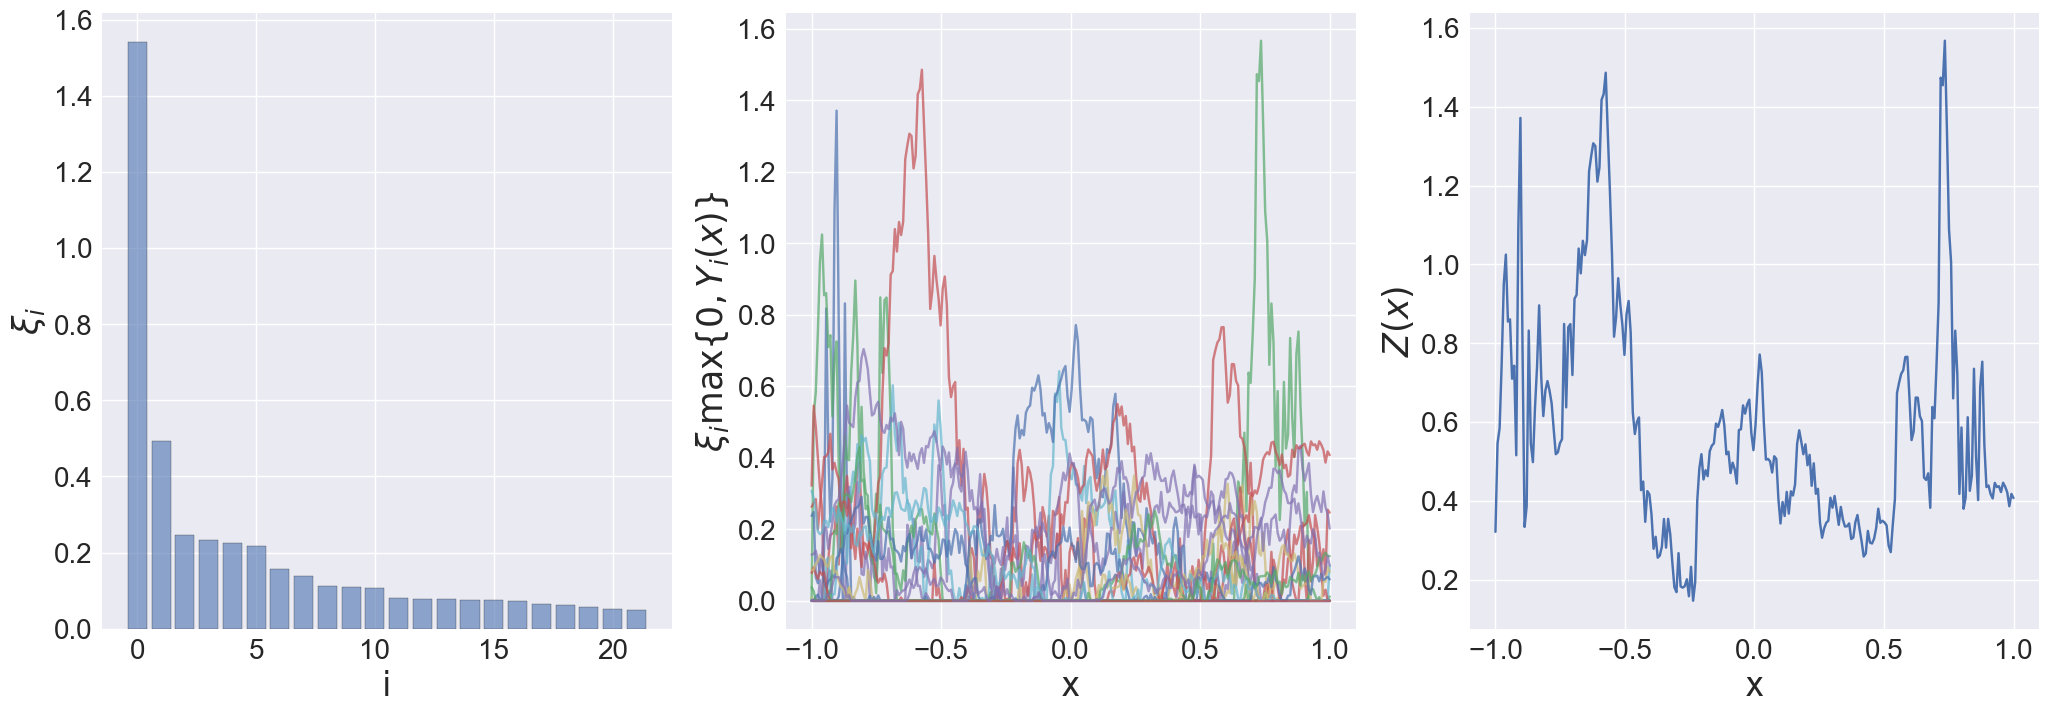

In [228]:
#Plot
fig, axs = plt.subplots(1, 3, figsize = (25,8))

axs[0].bar(np.arange(0, sim), sorted_points[0:sim], alpha = 0.6, edgecolor = "black")
for i in range(sim):
    axs[1].plot(x, scaled_processes[i], alpha = 0.7)
axs[2].plot(x, max_process)

#Legend
axs[0].set_xlabel("i", fontsize = axsize)
axs[0].set_ylabel(r"$\xi_i$", fontsize = axsize)

axs[1].set_xlabel("x", fontsize = axsize)
axs[1].set_ylabel(r"$\xi_i \max \{0, Y_i(x) \}$", fontsize = axsize)

axs[2].set_xlabel("x", fontsize = axsize)
axs[2].set_ylabel(r"$Z(x)$", fontsize = axsize)

for ax in range(3):
    axs[ax].tick_params(axis='both', labelsize=ticksize)

#plt.savefig(path +"max_stable_simulation.pdf", bbox_inches = "tight")